In [1]:
#load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load a single file as a numpy array
def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

data = load_file('Datasets/train/Inertial Signals/total_acc_y_train.txt')
print(data.shape)

(7352, 128)


In [3]:
#load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix = ""):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3D
    loaded = np.dstack(loaded)
    return loaded

In [4]:
#load the total acc data
filenames = ['total_acc_x_train.txt', 'total_acc_y_train.txt', 'total_acc_z_train.txt']
total_acc = load_group(filenames, prefix='Datasets/train/Inertial Signals/')
print(total_acc.shape)

(7352, 128, 3)


In [5]:
#load a dataset group, such as train or test
def load_dataset(group, prefix =""):
    filepath = prefix + group + "/Inertial Signals/"
    #load all 9 files as a single array
    filenames = list()
    #total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    #body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    #body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    #load class output
    y = load_file(prefix + group + "/y_" + group + ".txt")
    return X, y

In [6]:
#load all train
trainX, trainy = load_dataset("train", "Datasets/")
print(trainX.shape, trainy.shape)
#load all test
testX, testy = load_dataset("test", "Datasets/")
print(testX.shape, testy.shape)

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)


In [7]:
# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
    # get row indexes for the subject id
    ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
    # return the selected samples
    return X[ix, :, :], y[ix]
 

In [8]:
 
# convert a series of windows to a 1D list
def to_series(windows):
    series = list()
    for window in windows:
        # remove the overlap from the window
        half = int(len(window) / 2) - 1
        for value in window[-half:]:
            series.append(value)
    return series

In [9]:
 
# plot the data for one subject
def plot_subject(X, y):
    plt.figure()
    # determine the total number of plots
    n, off = X.shape[2] + 1, 0
    # plot total acc
    for i in range(3):
        plt.subplot(n, 1, off+1)
        plt.plot(to_series(X[:, :, off]))
        plt.title('total acc '+str(i), y=0, loc='left')
        off += 1
    # plot body acc
    for i in range(3):
        plt.subplot(n, 1, off+1)
        plt.plot(to_series(X[:, :, off]))
        plt.title('body acc '+str(i), y=0, loc='left')
        off += 1
    # plot body gyro
    for i in range(3):
        plt.subplot(n, 1, off+1)
        plt.plot(to_series(X[:, :, off]))
        plt.title('body gyro '+str(i), y=0, loc='left')
        off += 1
    # plot activities
    plt.subplot(n, 1, n)
    plt.plot(y)
    plt.title('activity', y=0, loc='left')
    plt.show()

[ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]
(347, 128, 9) (347, 1)


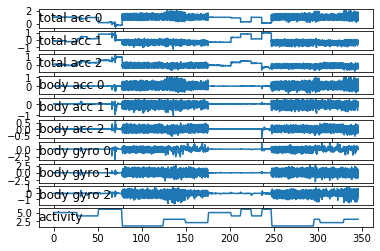

In [10]:
#load data 
trainX, trainy = load_dataset("train", "Datasets/")
#load mapping of rows to subjects
sub_map = load_file("Datasets/train/subject_train.txt")
train_subjects = np.unique(sub_map)
print(train_subjects)
#get the data for one subject
sub_id = train_subjects[0]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
print(subX.shape, suby.shape)
#plot data for subject
plot_subject(subX, suby)

In [11]:
# plot histograms for multiple subjects
def plot_subject_histograms(X, y, sub_map, n=10):
    plt.figure()
    # get unique subjects
    subject_ids = np.unique(sub_map[:,0])
    # enumerate subjects
    xaxis = None
    for k in range(n):
        sub_id = subject_ids[k]
        # get data for one subject
        subX, _ = data_for_subject(X, y, sub_map, sub_id)
        # total acc
        for i in range(3):
            ax = plt.subplot(n, 1, k+1, sharex=xaxis)
            ax.set_xlim(-1,1)
            if k == 0:
                xaxis = ax
            plt.hist(to_series(subX[:,:,6 + i]), bins=100)
    plt.show()

/Users/rey10/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


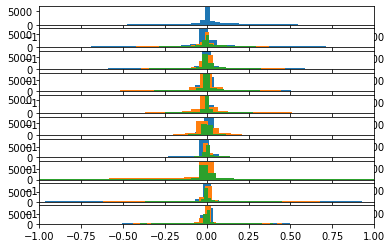

In [12]:
#load training dataset
X, y = load_dataset("train", "Datasets/")
#load mapping of rows to subjects
sub_map = load_file("Datasets/train/subject_train.txt")
#Plot histograms for subjects
plot_subject_histograms(X, y, sub_map)

In [13]:
#group data by activity
def data_by_activity(X, y, activities):
    #group windows by activity
    return { a:X[y[:,0] == a, :, :] for a in activities}

In [14]:
#plot histograms for each activity for a subject
def plot_activity_histograms(X, y):
    # get a list of unique activities for the subject
    activity_ids = np.unique(y[:,0])
    # group windows by activity
    grouped = data_by_activity(X, y, activity_ids)
    # plot per activity, histograms for each axis
    plt.figure()
    xaxis = None
    for k in range(len(activity_ids)):
        act_id = activity_ids[k]
        # total acceleration
        for i in range(3):
            ax = plt.subplot(len(activity_ids), 1, k+1, sharex=xaxis)
            ax.set_xlim(-1,1)
            if k == 0:
                xaxis = ax
            plt.hist(to_series(grouped[act_id][:,:,i]), bins=100)
            plt.title('activity '+str(act_id), y=0, loc='left')
    plt.show()

[ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]
(347, 128, 9) (347, 1)


/Users/rey10/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


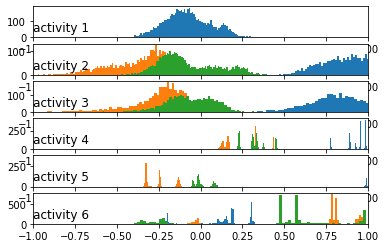

In [15]:
#load data 
trainX, trainy = load_dataset("train", "Datasets/")
#load mapping of rows to subjects
sub_map = load_file("Datasets/train/subject_train.txt")
train_subjects = np.unique(sub_map)
print(train_subjects)
#get the data for one subject
sub_id = train_subjects[0]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
print(subX.shape, suby.shape)
#plot data for subject
plot_activity_histograms(subX, suby)

In [16]:
# plot activity durations by subject
def plot_activity_durations_by_subject(X, y, sub_map):
    # get unique subjects and activities
    subject_ids = np.unique(sub_map[:,0])
    activity_ids = np.unique(y[:,0])
    # enumerate subjects
    activity_windows = {a:list() for a in activity_ids}
    for sub_id in subject_ids:
        # get data for one subject
        _, subj_y = data_for_subject(X, y, sub_map, sub_id)
        # count windows by activity
        for a in activity_ids:
            activity_windows[a].append(len(subj_y[subj_y[:,0]==a]))
    # organize durations into a list of lists
    durations = [activity_windows[a] for a in activity_ids]
    plt.boxplot(durations, labels=activity_ids)
    plt.show()
 

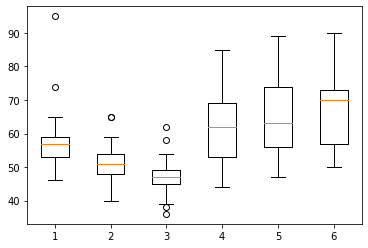

In [17]:
#load data 
trainX, trainy = load_dataset("train", "Datasets/")
#load mapping of rows to subjects
sub_map = load_file("Datasets/train/subject_train.txt")
#plot durations
plot_activity_durations_by_subject(X, y, sub_map)